In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#csv files
population_df = pd.read_csv("Illinois_Population.csv")
crime_df = pd.read_csv("total_crime_area.csv")
census_to_communityarea_key = pd.read_csv("community_area_to_census.csv")

In [3]:
#get dataframe info
population_df.head()

,Unnamed: 0,Name,Total Population,Public Use Microdata Area,Year
0,0,"Jo Daviess, Carroll, Whiteside & Lee Counties ...",132179,104,2012
1,1,"Rock Island County PUMA, Illinois",147504,105,2012
2,2,"Henry, Mercer, Henderson, Warren, Hancock, McD...",180417,202,2012
3,3,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,300,2012
4,4,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,401,2012


In [4]:
#drop extra columns
population = population_df[["Name",'Total Population',"Year"]]

In [5]:
crime_df.keys()
crime_df.head()

,Unnamed: 0,Crimes Reported,Crimes Reported.1,Crimes Reported.2,Crimes Reported.3
0,Year,2012.0,2013.0,2014.0,2015.0
1,Community Area,NaN,NaN,NaN,NaN
2,0.0,6.0,3.0,2.0,2.0
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0


In [6]:
#change name for crime_df columns and remove first three rows
crime_df_1 = crime_df.rename(columns={'Unnamed: 0':'Community Area', 'Crimes Reported':"2012", 'Crimes Reported.1':'2013',
       'Crimes Reported.2':'2014', 'Crimes Reported.3':'2015'})
crime_df_1.head()

,Community Area,2012,2013,2014,2015
0,Year,2012.0,2013.0,2014.0,2015.0
1,Community Area,NaN,NaN,NaN,NaN
2,0.0,6.0,3.0,2.0,2.0
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0


In [7]:
crime_df_2 = crime_df_1.drop([0,1,2])

In [8]:
#check crime_df
crime_df_2.count()
crime_df_2.head()

,Community Area,2012,2013,2014,2015
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0
5,3.0,4976.0,4289.0,3815.0,3662.0
6,4.0,2338.0,2218.0,1898.0,1770.0
7,5.0,1920.0,1723.0,1541.0,1395.0


In [9]:
crime_df_2.dtypes
crime_df_2['Community Area'] = crime_df_2['Community Area'].astype(float)

In [10]:
#unstack crime data to match up with population better
crime_2012 = crime_df_2[["Community Area",'2012']]
crime_2013 = crime_df_2[["Community Area",'2013']]
crime_2014 = crime_df_2[["Community Area",'2014']]
crime_2015 = crime_df_2[["Community Area",'2015']]
crime_2015.head()

,Community Area,2015
3,1.0,3590.0
4,2.0,3109.0
5,3.0,3662.0
6,4.0,1770.0
7,5.0,1395.0


In [11]:
#Rename dataframes
crime_2012 = crime_2012.rename(columns={'2012':'Total Crimes'})
crime_2013 = crime_2013.rename(columns={'2013':'Total Crimes'})
crime_2014 = crime_2014.rename(columns={'2014':'Total Crimes'})
crime_2015 = crime_2015.rename(columns={'2015':'Total Crimes'})
crime_2015.head()

,Community Area,Total Crimes
3,1.0,3590.0
4,2.0,3109.0
5,3.0,3662.0
6,4.0,1770.0
7,5.0,1395.0


In [12]:
#Add year column to dataframes
crime_2012["Year"]=2012
crime_2013["Year"]=2013
crime_2014["Year"]=2014
crime_2015["Year"]=2015
crime_2015.head()



,Community Area,Total Crimes,Year
3,1.0,3590.0,2015
4,2.0,3109.0,2015
5,3.0,3662.0,2015
6,4.0,1770.0,2015
7,5.0,1395.0,2015


In [13]:
#add crime dfs together
crime_total = crime_2012.append(crime_2013, sort=True)
crime_total = crime_total.append(crime_2014, sort=True)
crime_total = crime_total.append(crime_2015, sort=True)
crime_total.count()

Community Area    308
Total Crimes      308
Year              308
dtype: int64

In [14]:
#check column names for merge
census_to_communityarea_key.keys()

Index(['Unnamed: 0', 'Community', 'Community \nNumber', 'Public Use Area'], dtype='object')

In [15]:
#rename to match crime_df and population_df
census_to_comm = census_to_communityarea_key.rename(columns={"Community \nNumber":'Community Area','Public Use Area':'Name'})

In [16]:
#merge census areas to crime data
crime_to_census = pd.merge(crime_total, census_to_comm, how='outer', on=['Community Area'])


In [17]:
#check merge
crime_to_census.head()
crime_to_census.count()

Community Area    308
Total Crimes      308
Year              308
Unnamed: 0        308
Community         308
Name              260
dtype: int64

In [18]:
#drop na values where community areas don't match up to census data
crime_to_census = crime_to_census.dropna()

In [19]:
#check again
crime_to_census.count()
crime_to_census.nunique()

Community Area     65
Total Crimes      252
Year                4
Unnamed: 0         65
Community          65
Name               19
dtype: int64

In [20]:
#sum all of the community area crimes to match the census by year
crime_to_census_gb = crime_to_census.groupby(['Year','Name'], as_index=False)['Total Crimes'].sum()

In [21]:
#display groupby
crime_to_census_gb.head()

,Year,Name,Total Crimes
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0


In [22]:
crime_to_census_gb.nunique()

Year             4
Name            19
Total Crimes    76
dtype: int64

In [23]:
#merge population data to census data
population_census = pd.merge(crime_to_census_gb, population, how='left', on=['Name','Year'])



In [24]:
#check dataframe
population_census.count()
population_census.nunique()

Year                 4
Name                19
Total Crimes        76
Total Population    76
dtype: int64

In [25]:
population_census.head()

,Year,Name,Total Crimes,Total Population
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0,127124
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0,167887
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0,161170
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0,145745
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0,147691


In [26]:
#crime per capita by census area
population_census["Crime Per Capita"] = population_census.apply(lambda row: row['Total Crimes'] / row['Total Population'], axis=1)

In [27]:
population_census.head()

,Year,Name,Total Crimes,Total Population,Crime Per Capita
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0,127124,0.164619
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0,167887,0.078487
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0,161170,0.078836
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0,145745,0.056866
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0,147691,0.058006


In [28]:
#pull out crime data
crime_rate_df = population_census[["Year",'Name','Crime Per Capita']]
crime_rate_df.head()

,Year,Name,Crime Per Capita
0,2012,"Chicago City (Central)--Near North Side, Loop ...",0.164619
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",0.078487
2,2012,Chicago City (North)--Lake View & Lincoln Park...,0.078836
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",0.056866
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",0.058006


In [29]:
#pivot crime data by year
crime_rate_pivot = crime_rate_df.pivot(index='Name',columns='Year', values='Crime Per Capita')
crime_rate_pivot.head()

Year,2012,2013,2014,2015
Name,,,,
"Chicago City (Central)--Near North Side, Loop & Near South Side PUMA; Illinois",0.164619,0.148385,0.131907,0.131038
"Chicago City (North)--Edgewater, Uptown & Rogers Park PUMA; Illinois",0.078487,0.068419,0.060520,0.057836
"Chicago City (North)--Lake View & Lincoln Park PUMA, Illinois",0.078836,0.069587,0.059700,0.056632
"Chicago City (North)--West Ridge, Lincoln Square & North Center PUMA; Illinois",0.056866,0.052906,0.046492,0.042508
"Chicago City (Northwest)--Irving Park, Albany Park, Forest Glen & North Park PUMA; Illinois",0.058006,0.050690,0.045137,0.047066


In [30]:
crime_rate_pivot = crime_rate_pivot.reset_index()

In [31]:
crime_rate_pivot.head()

Year,Name,2012,2013,2014,2015
0,"Chicago City (Central)--Near North Side, Loop ...",0.164619,0.148385,0.131907,0.131038
1,"Chicago City (North)--Edgewater, Uptown & Roge...",0.078487,0.068419,0.060520,0.057836
2,Chicago City (North)--Lake View & Lincoln Park...,0.078836,0.069587,0.059700,0.056632
3,"Chicago City (North)--West Ridge, Lincoln Squa...",0.056866,0.052906,0.046492,0.042508
4,"Chicago City (Northwest)--Irving Park, Albany ...",0.058006,0.050690,0.045137,0.047066


In [32]:
crime_rate_pivot = crime_rate_pivot.sort_values(['Name']).reset_index(drop=True)

In [33]:
crime_rate_pivot.keys()

Index(['Name', 2012, 2013, 2014, 2015], dtype='object', name='Year')

Made graph to look at crime rate by area, to match to population chart that did not end up getting used (from location_to_population_graph code). Both graphs do not really show much so commenting out the save.png

Will be creating another graph lower down to compare individual areas

In [34]:
#define chart variables
x=np.arange(0,len(crime_rate_pivot["Name"]))
y1=crime_rate_pivot[2012]
y2=crime_rate_pivot[2013]
y3=crime_rate_pivot[2014]
y4=crime_rate_pivot[2015]
legend = ["2012","2013","2014","2015"]

([<matplotlib.axis.XTick at 0x119977438>,
 <a list of 19 Text xticklabel objects>)

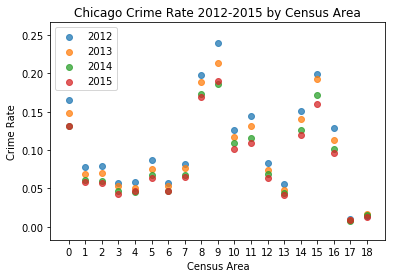

In [35]:
#graph of population over time
fig, ax = plt.subplots()
ax.scatter(x, y1, label="2012", alpha=.75)
ax.scatter(x, y2, label="2013", alpha=.75)
ax.scatter(x, y3, label="2014", alpha=.75)
ax.scatter(x, y4, label="2015", alpha=.75)


ax.legend(loc="upper left")
plt.xlabel("Census Area")
plt.ylabel("Crime Rate")
plt.title("Chicago Crime Rate 2012-2015 by Census Area")
plt.xticks(x)

In [36]:
#save figure
    #fig.savefig("crime_rate_over_time.png", bbox_inches="tight")

In [37]:
#find total crime data, average and percent change

In [38]:
#total crime data
sum_2012 = population_census.loc[0:18].sum()
sum_2013 = population_census.loc[19:37].sum()
sum_2014 = population_census.loc[38:56].sum()
sum_2015 = population_census.loc[57:75].sum()
sum_2015

Year                                                            38285
Name                Chicago City (Central)--Near North Side, Loop ...
Total Crimes                                                   250510
Total Population                                              2974031
Crime Per Capita                                              1.58212
dtype: object

In [39]:
#check data with .loc to make sure crime data is split correctly
population_census.loc[56]

Year                                                             2014
Name                Cook County (West)--Leyden, Norwood Park (Sout...
Total Crimes                                                     2014
Total Population                                               132059
Crime Per Capita                                            0.0152508
Name: 56, dtype: object

In [40]:
#Total crime rate
crime_rate_pivot.loc[19,'Name']="Crime Rate All of Chicago"
crime_rate_pivot.loc[19,2012] = sum_2012[2]/sum_2012[3]
crime_rate_pivot.loc[19,2013] = sum_2013[2]/sum_2013[3]
crime_rate_pivot.loc[19,2014] = sum_2014[2]/sum_2014[3]
crime_rate_pivot.loc[19,2015] = sum_2015[2]/sum_2015[3]

In [41]:
#show last row
crime_rate_pivot.tail()

Year,Name,2012,2013,2014,2015
15,"Chicago City (West)--North & South Lawndale, H...",0.199579,0.192197,0.171807,0.160594
16,"Chicago City (West)--West Town, Near West Side...",0.128130,0.113232,0.100742,0.096572
17,"Cook County (North)--Maine, Norwood Park Towns...",0.009612,0.008209,0.008027,0.008226
18,"Cook County (West)--Leyden, Norwood Park (Sout...",0.013990,0.016245,0.015251,0.013287
19,Crime Rate All of Chicago,0.107640,0.098232,0.087790,0.084232


In [42]:
#calculate percentage change of crime rate over time
crime_rate_pivot["Net Change"]=crime_rate_pivot.apply(lambda row: row[2015] - row[2012], axis=1)
crime_rate_pivot["Percent Change"]=crime_rate_pivot.apply(lambda row: row['Net Change'] / row[2012]*100, axis=1)

In [43]:
crime_rate_pivot.head()

Year,Name,2012,2013,2014,2015,Net Change,Percent Change
0,"Chicago City (Central)--Near North Side, Loop ...",0.164619,0.148385,0.131907,0.131038,-0.033580,-20.398925
1,"Chicago City (North)--Edgewater, Uptown & Roge...",0.078487,0.068419,0.060520,0.057836,-0.020651,-26.311137
2,Chicago City (North)--Lake View & Lincoln Park...,0.078836,0.069587,0.059700,0.056632,-0.022204,-28.164533
3,"Chicago City (North)--West Ridge, Lincoln Squa...",0.056866,0.052906,0.046492,0.042508,-0.014358,-25.249037
4,"Chicago City (Northwest)--Irving Park, Albany ...",0.058006,0.050690,0.045137,0.047066,-0.010941,-18.861258


In [44]:
#calculate average crime rate
crime_rate_pivot["Average"]=crime_rate_pivot.apply(lambda row: (row[2012]+row[2013]+row[2014]+row[2015])/4, axis=1)

In [45]:
#format percent column and display table
crime_rate_pivot["Percent Change"] = crime_rate_pivot["Percent Change"].map("{:,.2f}%".format)
crime_rate_pivot.tail()

Year,Name,2012,2013,2014,2015,Net Change,Percent Change,Average
15,"Chicago City (West)--North & South Lawndale, H...",0.199579,0.192197,0.171807,0.160594,-0.038985,-19.53%,0.181044
16,"Chicago City (West)--West Town, Near West Side...",0.128130,0.113232,0.100742,0.096572,-0.031557,-24.63%,0.109669
17,"Cook County (North)--Maine, Norwood Park Towns...",0.009612,0.008209,0.008027,0.008226,-0.001385,-14.41%,0.008519
18,"Cook County (West)--Leyden, Norwood Park (Sout...",0.013990,0.016245,0.015251,0.013287,-0.000703,-5.02%,0.014693
19,Crime Rate All of Chicago,0.107640,0.098232,0.087790,0.084232,-0.023407,-21.75%,0.094474
